In [1]:
import sys
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# sys.path.insert(0, '../musicalrobot/')

In [3]:
# Importing the required modules
from musicalrobot import irtemp
from musicalrobot import edge_detection as ed
from musicalrobot import pixel_analysis as pa
from musicalrobot import data_encoding as de

Using TensorFlow backend.


In [4]:
%matplotlib inline

## PART A:
### The temperature profile of the samples and plate is determined by detecting the edges, filling and labeling them, and monitoring the temperature at their centroids.

#### Use the function 'edge_detection.input_file' to load the input file

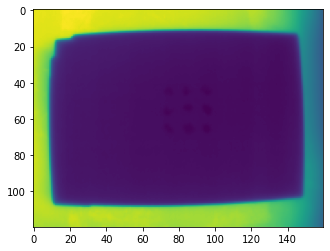

In [5]:
frames = ed.input_file('../musicalrobot/data/10_17_19_PPA_Shallow_plate.tiff')
plt.imshow(frames[0])

#### Crop the input file if required to remove the noise and increase the accuracy of edge detection

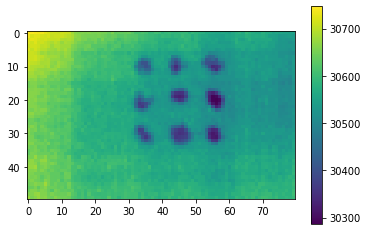

In [6]:
crop_frame = []
for frame in frames:
    crop_frame.append(frame[35:85,40:120])
plt.imshow(crop_frame[0])
plt.colorbar()

#### Use the wrapping function edge_detection.inflection_temp 

In [7]:
# Using the wrapping function
sorted_regprops, s_temp, p_temp, s_infl, result_df = ed.inflection_temp(crop_frame, 3, 3,'../musicalrobot/data/')

/Users/shrilakshmisbonageri/miniconda3/envs/image/lib/python3.6/site-packages/musicalrobot/edge_detection.py:168: FutureWarning: circle is deprecated in favor of disk.circle will be removed in version 0.19
  rr, cc = circle(row[c], column[c], radius = radius[c]/3)


Directory  ../musicalrobot/data/noise_images  already exists
Noise images generated
{'noiseless': 0, 'noisy': 1}
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Directory  ../musicalrobot/data/inf_images  already exists
Generated inflection images
{'inf': 0, 'no_inf': 1}


/Users/shrilakshmisbonageri/miniconda3/envs/image/lib/python3.6/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [8]:
result_df

,Sample number,Noise net,Inf net,Melting point
0,0,Noiseless,Inflection,44.6547
1,1,Noiseless,Inflection,43.4218
2,2,Noiseless,Inflection,44.9542
3,3,Noiseless,Inflection,48.003
4,4,Noiseless,Inflection,43.5165
5,5,Noiseless,Inflection,44.5817
6,6,Noiseless,Inflection,45.062
7,7,Noiseless,Inflection,43.7941
8,8,Noiseless,Inflection,43.8503


#### Plotting the locations at which the temperature was recorded

Text(0.5, 1.0, 'Sample centroid and plate locations at which the temperature profile is monitored')

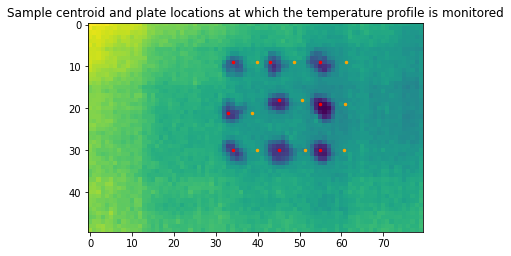

In [9]:
# Plotting the original image with the samples
# and centroid and plate location
plt.imshow(crop_frame[0])
plt.scatter(sorted_regprops[0]['Plate_coord'],sorted_regprops[0]['Row'],c='orange',s=6)
plt.scatter(sorted_regprops[0]['Column'],sorted_regprops[0]['Row'],s=6,c='red')
plt.title('Sample centroid and plate locations at which the temperature profile is monitored')

Text(0.5, 1.0, 'Temperature of the sample against the temperature of the plate')

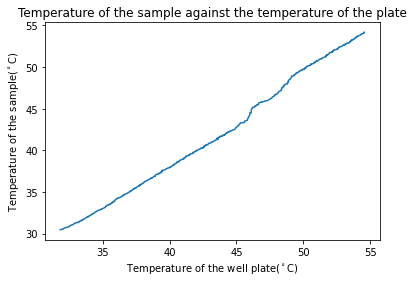

In [10]:
# Plotting the temperature profile of a sample against the temperature profile
# of the plate at a location next to the sample.
plt.plot(p_temp[5],s_temp[5])
plt.ylabel('Temperature of the sample($^\circ$C)')
plt.xlabel('Temperature of the well plate($^\circ$C)')
plt.title('Temperature of the sample against the temperature of the plate')

## Part B:
* The temperature profile of the samples and the plate is obtained by summing the pixel values over individual rows and columns, finding the troughs in the array of all the column and row sums.
* The temperature profile is then obtained by monitoring the temperature value at the intersection of peak values in the column and row sums. 

#### Load the input file as frames

#### Use the function irtemp.pixel_temp to get the temperature of the samples and at plate locations next to the samples in every frame of the input video.

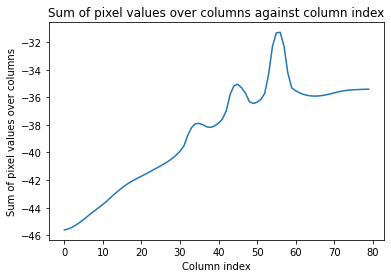

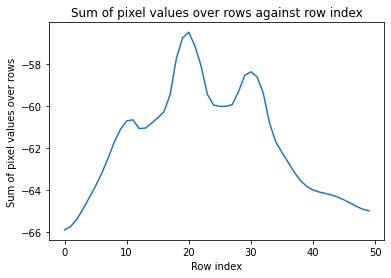

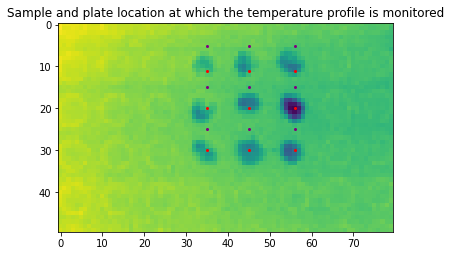

/Users/shrilakshmisbonageri/miniconda3/envs/image/lib/python3.6/site-packages/musicalrobot/pixel_analysis.py:253: FutureWarning: circle is deprecated in favor of disk.circle will be removed in version 0.19
  rr, cc = circle(x[i], y[i], radius = 1)


Directory  ../musicalrobot/data/noise_images  already exists
Noise images generated
{'noiseless': 0, 'noisy': 1}
Directory  ../musicalrobot/data/inf_images  already exists
Generated inflection images
{'inf': 0, 'no_inf': 1}


/Users/shrilakshmisbonageri/miniconda3/envs/image/lib/python3.6/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [11]:
result_df1 = pa.pixel_temp(crop_frame,n_columns = 3, n_rows = 3, freeze_heat=False, path='../musicalrobot/data/')

In [12]:
# Dataframe containing sample coordinates and corresponding melting points
result_df1

,Sample number,Noise net,Inf net,Melting point
0,0,Noiseless,Inflection,47.095
1,1,Noiseless,Inflection,46.0847
2,2,Noiseless,Inflection,44.9511
3,3,Noiseless,Inflection,45.0212
4,4,Noiseless,Inflection,44.6537
5,5,Noiseless,Inflection,44.1914
6,6,Noiseless,Inflection,44.2013
7,7,Noiseless,Inflection,43.117
8,8,Noiseless,Inflection,43.915
